In [31]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [32]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [33]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [34]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## create iPhone13_I own Models

## iPhone13_I dataset
the very first dataset

In [54]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.015625 +0.015625j  0.       +0.j        0.0078125+0.j        ...
 0.0234375+0.0078125j 0.0234375+0.0078125j 0.03125  -0.0078125j]
2048
77387
(2048, 77387)
[0.01826616 0.00950806 0.00373913 ... 0.00167015 0.00381105 0.00957042]
(10000, 2048)
(10000,)
[0.0078125+0.015625j  0.0078125+0.j        0.015625 +0.j        ...
 0.015625 +0.0234375j 0.015625 +0.j        0.015625 +0.j       ]
2048
81265
(2048, 81265)
[0.01835838 0.00961773 0.00350257 ... 0.00192106 0.00369137 0.00963282]
(20000, 2048)
(20000,)
[0.03125  +0.015625j  0.03125  +0.0078125j 0.015625 +0.0078125j ...
 0.0234375+0.015625j  0.0234375+0.0078125j 0.015625 -0.0078125j]
2048
82947
(2048, 82947)
[0.01815592 0.00944388 0.00397235 ... 0.00185365 0.0036876  0.00957425]
(30000, 2048)
(30000,)
[0.       +0.03125j  0.       +0.j       0.015625 +0.j       ...
 0.015625 -0.015625j 0.0234375+0.015625j 0.0078125+0.015625j]
2048
82654
(2048, 82654)
[0.01825963 0.00967498 0.00359683 ... 0.00195847 0.00358379 0.01038325]
(40000, 2048)
(40

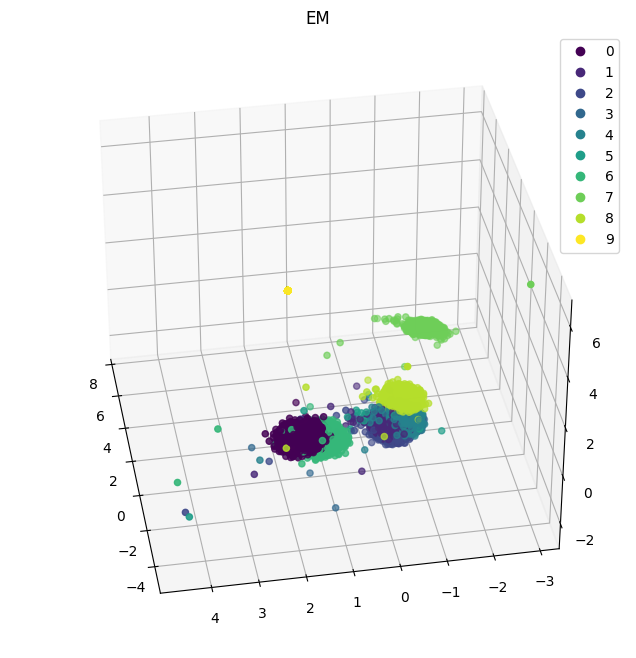

In [55]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13_I_scatter.pdf')

In [56]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [58]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 39s 15ms/step - loss: 1.9782 - accuracy: 0.3909 - val_loss: 1.4502 - val_accuracy: 0.7232
Epoch 2/30
2532/2532 [==============================] - 39s 16ms/step - loss: 0.9392 - accuracy: 0.8818 - val_loss: 0.5789 - val_accuracy: 0.9051
Epoch 3/30
2532/2532 [==============================] - 32s 13ms/step - loss: 0.3416 - accuracy: 0.9800 - val_loss: 0.1779 - val_accuracy: 0.9921
Epoch 4/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.1084 - accuracy: 0.9957 - val_loss: 0.0648 - val_accuracy: 0.9972
Epoch 5/30
2532/2532 [==============================] - 27s 11ms/step - loss: 0.0483 - accuracy: 0.9981 - val_loss: 0.0350 - val_accuracy: 0.9978
Epoch 6/30
2532/2532 [==============================] - 24s 10ms/step - loss: 0.0299 - accuracy: 0.9989 - val_loss: 0.0224 - val_accuracy: 0.9981
Epoch 7/30
2532/2532 [==============================] - 25s 10ms/step - loss: 0.0218 - accuracy: 0.9991 - val_loss: 0.0165 -

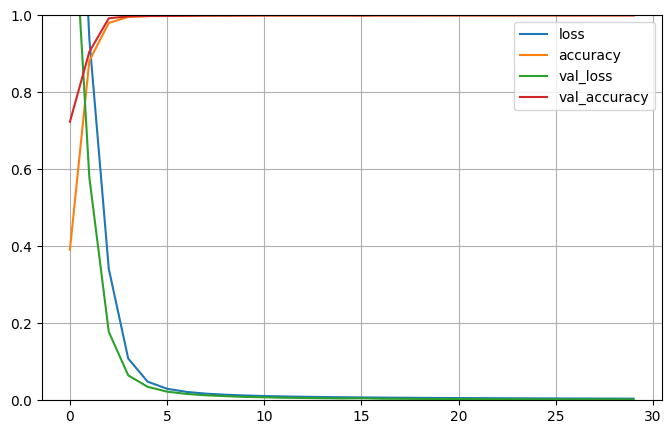

In [59]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [60]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")

In [61]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 3s 8ms/step - loss: 0.0046 - accuracy: 0.9998
test loss, test acc: [0.004638283513486385, 0.9998000264167786]


In [63]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 6ms/step
[0 6 5 ... 5 5 6]
0


In [64]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    0  993    0    0    0    0    0    0    0]
 [   1    0    0  938    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   1    0    0    0    0    0  998    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9998


Text(0.5, 1.0, 'Accuracy:1.000')

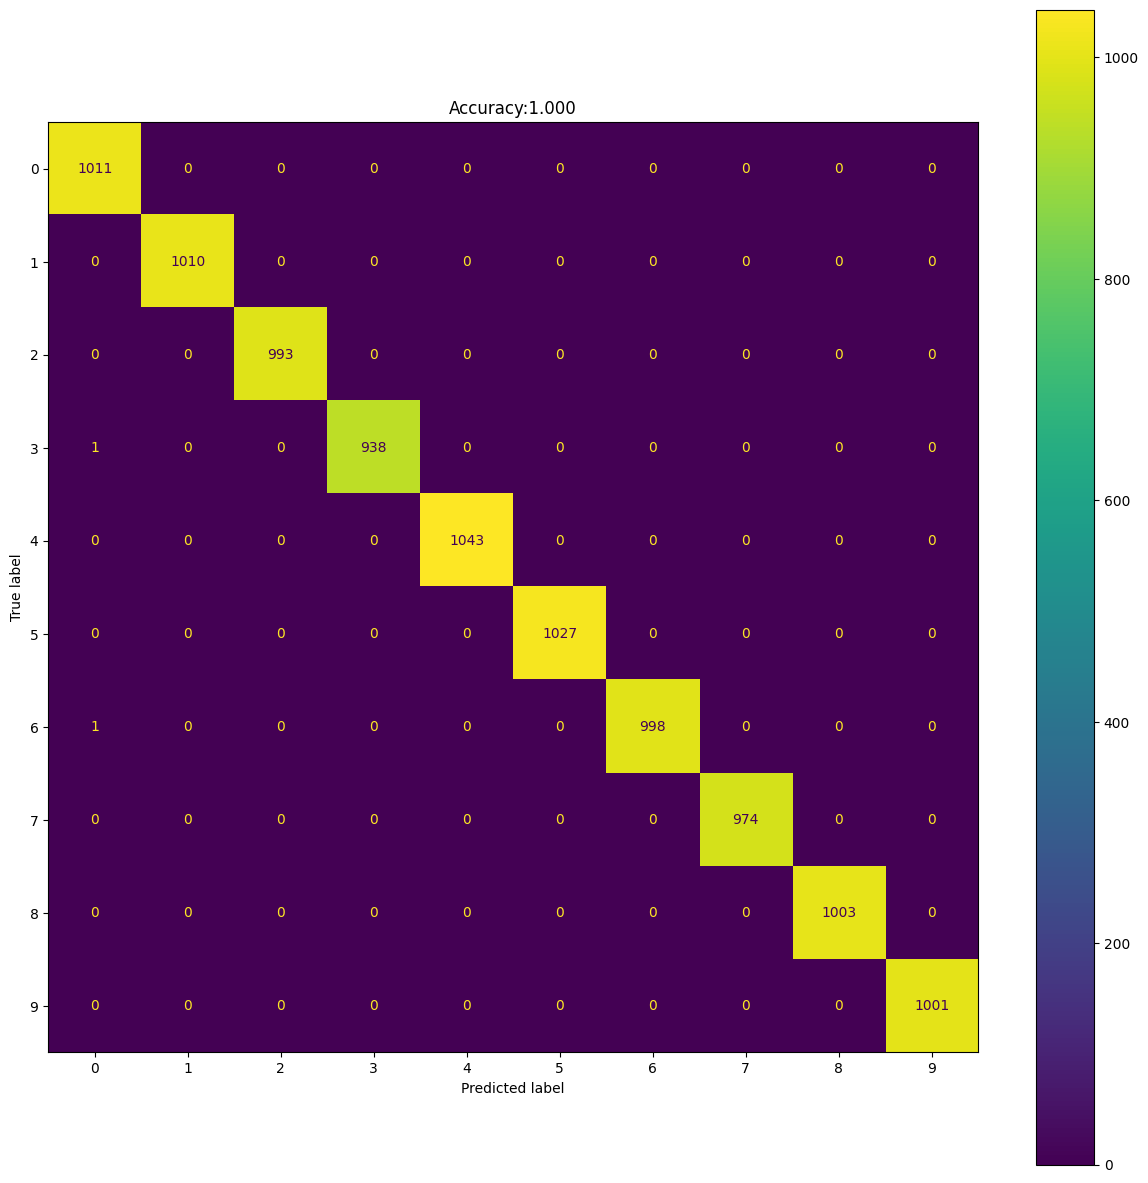

In [65]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_BeSh dataset

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone13_Beer Sheve,Israel/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[ 0.0859375+0.09375j    0.5625   -0.8046875j -0.984375 +0.4921875j ...
  0.015625 +0.0078125j  0.015625 +0.j         0.0078125+0.0078125j]
2048
143874
(2048, 143874)
[0.04423329 0.07092105 0.03909327 ... 0.03002222 0.05070389 0.04089695]
(10000, 2048)
(10000,)
[0.0078125+0.j        0.0234375-0.0078125j 0.015625 +0.015625j  ...
 0.0234375+0.j        0.015625 +0.0078125j 0.015625 -0.0078125j]
2048
141168
(2048, 141168)
[0.01816647 0.00949077 0.0032181  ... 0.00174878 0.00344826 0.00946195]
(20000, 2048)
(20000,)
[ 0.0078125+0.j        -0.0078125+0.0078125j  0.0234375+0.015625j  ...
  0.015625 +0.j         0.015625 +0.0078125j  0.015625 +0.j       ]
2048
154773
(2048, 154773)
[0.01807312 0.00971989 0.00374065 ... 0.00206749 0.00380799 0.00961199]
(30000, 2048)
(30000,)
[0.0078125+0.j        0.0234375+0.0078125j 0.015625 +0.j        ...
 0.0234375+0.0078125j 0.015625 +0.015625j  0.015625 +0.0078125j]
2048
131588
(2048, 131588)
[0.02084354 0.01262699 0.00525135 ... 0.00556843 0.00541259 0.0

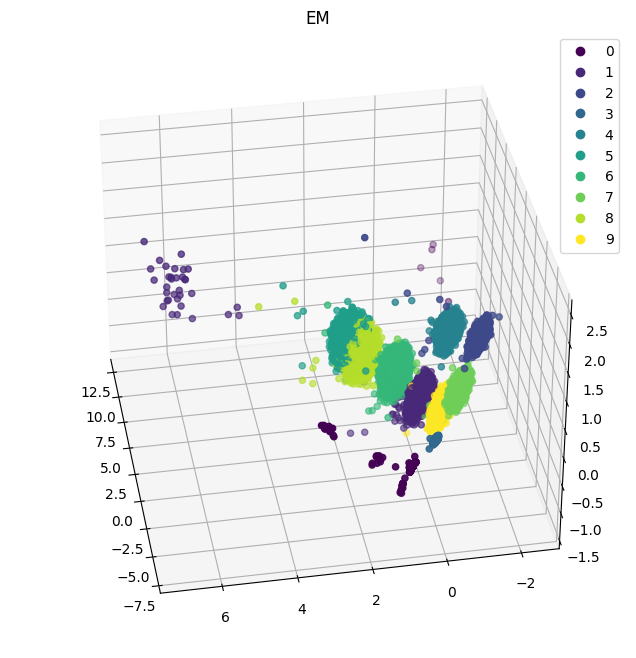

In [6]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13_I_BeSh_scatter.pdf')

In [7]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

2023-02-14 12:19:14.577151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [10]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 37s 15ms/step - loss: 1.9867 - accuracy: 0.4403 - val_loss: 1.4696 - val_accuracy: 0.6713
Epoch 2/30
2532/2532 [==============================] - 30s 12ms/step - loss: 0.9066 - accuracy: 0.9148 - val_loss: 0.4562 - val_accuracy: 0.9901
Epoch 3/30
2532/2532 [==============================] - 29s 12ms/step - loss: 0.2535 - accuracy: 0.9923 - val_loss: 0.1252 - val_accuracy: 0.9960
Epoch 4/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.0908 - accuracy: 0.9966 - val_loss: 0.0608 - val_accuracy: 0.9970
Epoch 5/30
2532/2532 [==============================] - 27s 11ms/step - loss: 0.0546 - accuracy: 0.9976 - val_loss: 0.0389 - val_accuracy: 0.9983
Epoch 6/30
2532/2532 [==============================] - 30s 12ms/step - loss: 0.0406 - accuracy: 0.9981 - val_loss: 0.0308 - val_accuracy: 0.9984
Epoch 7/30
2532/2532 [==============================] - 27s 11ms/step - loss: 0.0326 - accuracy: 0.9985 - val_loss: 0.0242 -

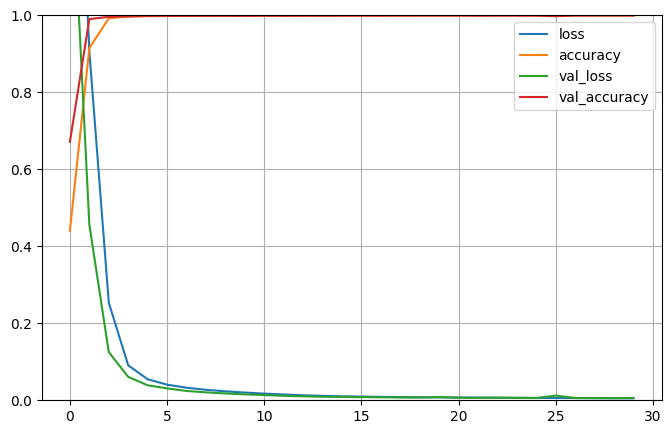

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")

In [14]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 5ms/step - loss: 0.0032 - accuracy: 0.9997
test loss, test acc: [0.0031957500614225864, 0.9997000098228455]


In [15]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 4ms/step
[0 6 5 ... 5 5 6]
0


In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1008    0    0    0    1    1    0    0    0]
 [   0    0  993    0    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1042    0    0    0    1    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9997


Text(0.5, 1.0, 'Accuracy:1.000')

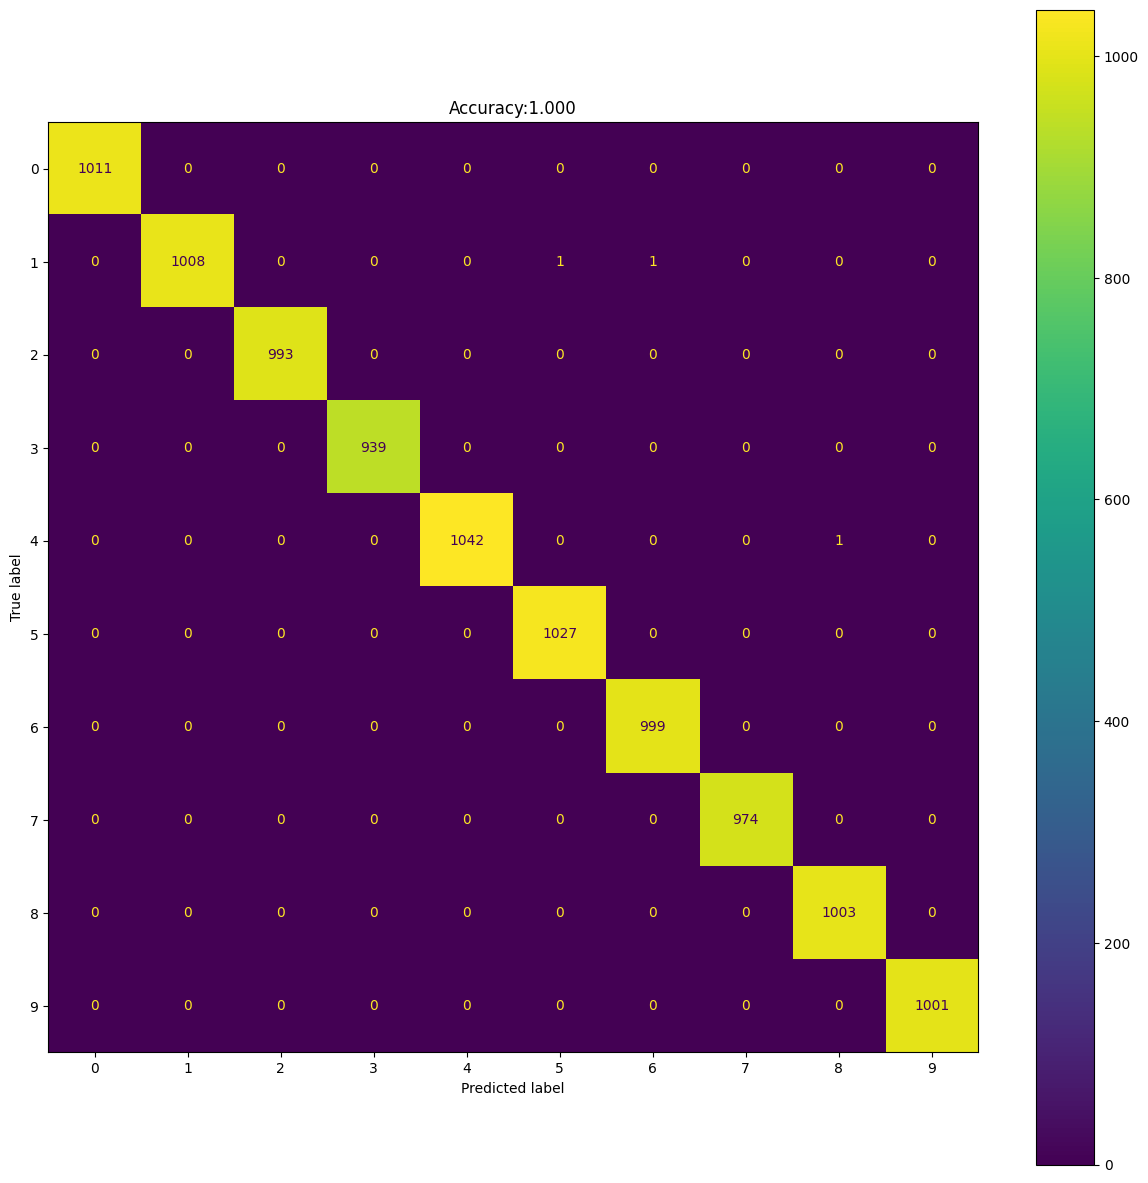

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_I_confusion_matrix.pdf')

## iPhone13_I(ii) dataset

In [23]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Validate/iPhone13/iPhone13_I_(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web-browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0234375+0.0078125j 0.0234375+0.015625j  0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.j       ]
2048
110831
(2048, 110831)
[0.01812677 0.00948843 0.00374635 ... 0.00173856 0.00339424 0.00953503]
(10000, 2048)
(10000,)
[0.015625 +0.0234375j 0.0234375+0.0078125j 0.015625 +0.j        ...
 0.03125  +0.j        0.015625 +0.015625j  0.015625 +0.015625j ]
2048
129100
(2048, 129100)
[0.0181794  0.00955586 0.00382046 ... 0.00183343 0.00367072 0.00966199]
(20000, 2048)
(20000,)
[0.0078125+0.015625j  0.0078125-0.015625j  0.0234375-0.0078125j ...
 0.0078125+0.j        0.015625 +0.j        0.015625 +0.j       ]
2048
109132
(2048, 109132)
[0.0182145  0.00951279 0.00374896 ... 0.00194378 0.00367706 0.00947664]
(30000, 2048)
(30000,)
[0.0234375+0.0078125j 0.03125  +0.j        0.0078125-0.0078125j ...
 0.0234375-0.0078125j 0.0234375+0.015625j  0.0234375+0.0078125j]
2048
127272
(2048, 127272)
[0.01857133 0.00952372 0.00331539 ... 0.00185035 0.00354866 0.0094942 ]
(40

In [24]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [26]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [28]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 37s 15ms/step - loss: 1.0236 - accuracy: 0.8824 - val_loss: 0.6359 - val_accuracy: 0.9384
Epoch 2/30
2532/2532 [==============================] - 35s 14ms/step - loss: 0.3650 - accuracy: 0.9784 - val_loss: 0.1845 - val_accuracy: 0.9908
Epoch 3/30
2532/2532 [==============================] - 32s 12ms/step - loss: 0.1214 - accuracy: 0.9948 - val_loss: 0.0721 - val_accuracy: 0.9968
Epoch 4/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.0603 - accuracy: 0.9973 - val_loss: 0.0392 - val_accuracy: 0.9981
Epoch 5/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.0390 - accuracy: 0.9982 - val_loss: 0.0264 - val_accuracy: 0.9988
Epoch 6/30
2532/2532 [==============================] - 30s 12ms/step - loss: 0.0285 - accuracy: 0.9985 - val_loss: 0.0198 - val_accuracy: 0.9993
Epoch 7/30
2532/2532 [==============================] - 33s 13ms/step - loss: 0.0222 - accuracy: 0.9987 - val_loss: 0.0159 -

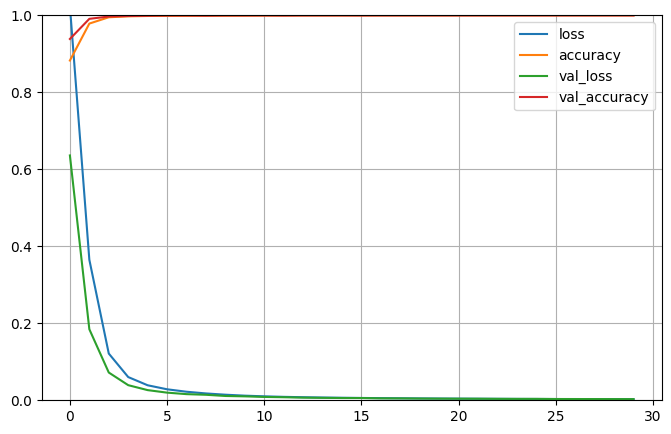

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [30]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")

In [31]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 3s 5ms/step - loss: 0.0024 - accuracy: 0.9999
test loss, test acc: [0.002443204401060939, 0.9998999834060669]


In [32]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 6ms/step
[0 6 5 ... 5 5 6]
0


In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1010    0    1    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    0  993    0    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9999


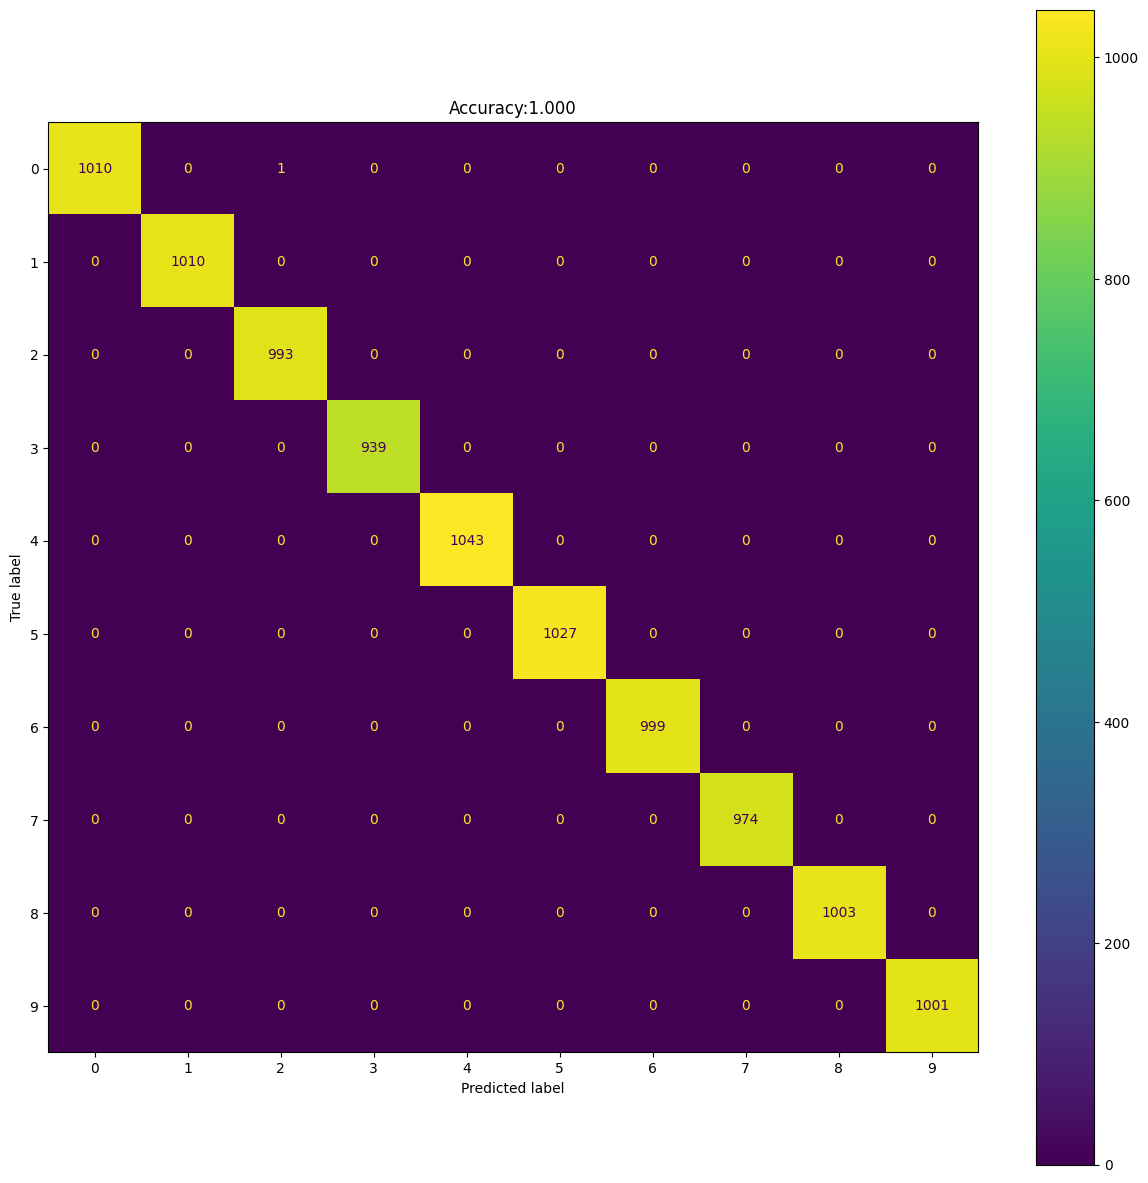

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_I_confusion_matrix.pdf')

## iPhone13_I(iii) dataset

In [39]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_(iii)/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0078125+0.j        0.015625 -0.0078125j 0.015625 +0.015625j  ...
 0.0078125+0.015625j  0.015625 -0.0078125j 0.0234375+0.j       ]
2048
80972
(2048, 80972)
[0.01880924 0.00981325 0.00367837 ... 0.00182399 0.00400141 0.00982514]
(10000, 2048)
(10000,)
[0.015625 +0.015625j  0.0234375+0.j        0.015625 +0.0078125j ...
 0.015625 -0.0078125j 0.0234375+0.0078125j 0.015625 +0.0078125j]
2048
76655
(2048, 76655)
[0.01861852 0.00976308 0.00390186 ... 0.00166154 0.00340372 0.00974781]
(20000, 2048)
(20000,)
[0.0234375+0.j        0.015625 +0.015625j  0.015625 +0.0078125j ...
 0.0234375+0.j        0.0234375+0.j        0.015625 +0.0078125j]
2048
79607
(2048, 79607)
[0.01836303 0.00984234 0.00339005 ... 0.00192302 0.00387786 0.00964942]
(30000, 2048)
(30000,)
[0.0078125+0.j        0.015625 +0.j        0.0234375+0.015625j  ...
 0.       +0.0078125j 0.015625 -0.0078125j 0.0078125+0.j       ]
2048
84264
(2048, 84264)
[0.01883226 0.00979095 0.00402313 ... 0.00170837 0.00366977 0.00980111]
(40000, 204

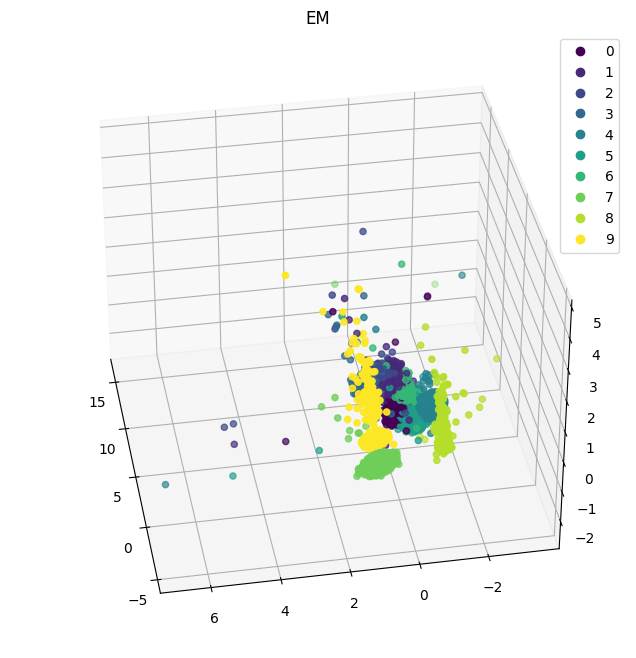

In [41]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13_I(iii)_scatter.pdf')

In [40]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [43]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 33s 13ms/step - loss: 2.0990 - accuracy: 0.2911 - val_loss: 1.7617 - val_accuracy: 0.5752
Epoch 2/30
2532/2532 [==============================] - 28s 11ms/step - loss: 1.1441 - accuracy: 0.8564 - val_loss: 0.5347 - val_accuracy: 0.9741
Epoch 3/30
2532/2532 [==============================] - 33s 13ms/step - loss: 0.2812 - accuracy: 0.9840 - val_loss: 0.1430 - val_accuracy: 0.9902
Epoch 4/30
2532/2532 [==============================] - 29s 11ms/step - loss: 0.1003 - accuracy: 0.9935 - val_loss: 0.0689 - val_accuracy: 0.9943
Epoch 5/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.0573 - accuracy: 0.9961 - val_loss: 0.0422 - val_accuracy: 0.9962
Epoch 6/30
2532/2532 [==============================] - 30s 12ms/step - loss: 0.0403 - accuracy: 0.9972 - val_loss: 0.0302 - val_accuracy: 0.9974
Epoch 7/30
2532/2532 [==============================] - 27s 11ms/step - loss: 0.0313 - accuracy: 0.9980 - val_loss: 0.0239 -

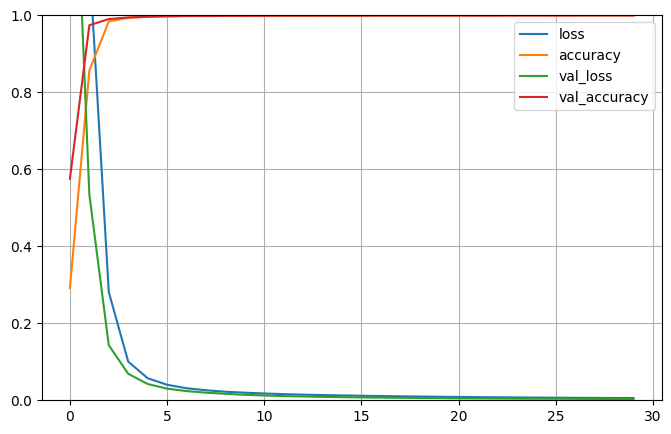

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [45]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")

In [46]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 3s 6ms/step - loss: 0.0074 - accuracy: 0.9990
test loss, test acc: [0.007367390673607588, 0.9990000128746033]


In [47]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [48]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1010    1    0    0    0    0    0    0    0    0]
 [   0 1007    0    1    0    1    1    0    0    0]
 [   0    2  990    1    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    1    0 1041    1    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    1    0    0    0  973    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.999


Text(0.5, 1.0, 'Accuracy:0.999')

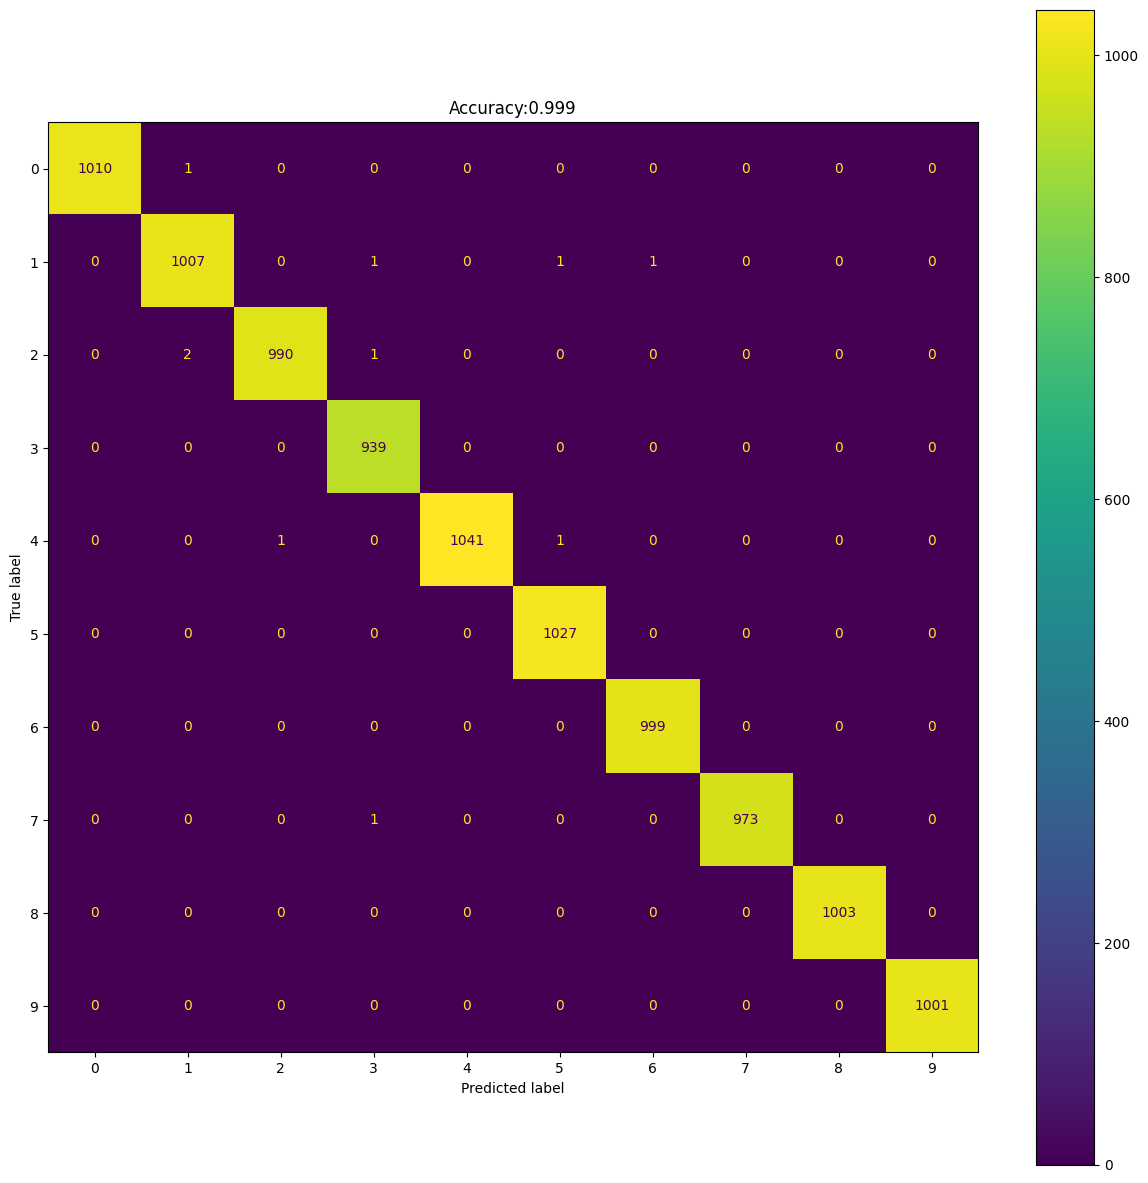

In [49]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 dataset

In [70]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_data1/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallary_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0234375+0.j        ...
 0.0234375+0.015625j  0.015625 +0.j        0.0078125+0.j       ]
2048
83750
(2048, 83750)
[0.01833543 0.00961571 0.00367982 ... 0.00215231 0.00389023 0.00958879]
(10000, 2048)
(10000,)
[0.03125 +0.0078125j 0.03125 +0.015625j  0.015625+0.015625j  ...
 0.015625+0.015625j  0.015625+0.j        0.015625+0.j       ]
2048
84262
(2048, 84262)
[0.01871342 0.00962076 0.00392026 ... 0.00172973 0.00385315 0.00959814]
(20000, 2048)
(20000,)
[0.015625 +0.0078125j 0.       +0.0078125j 0.0234375+0.015625j  ...
 0.015625 +0.0078125j 0.       -0.0078125j 0.015625 +0.0078125j]
2048
83224
(2048, 83224)
[0.01831909 0.00954875 0.00370389 ... 0.0018516  0.0036198  0.00960332]
(30000, 2048)
(30000,)
[0.0078125+0.0078125j 0.03125  +0.j        0.0078125+0.0078125j ...
 0.015625 +0.j        0.0234375+0.0078125j 0.015625 +0.015625j ]
2048
80898
(2048, 80898)
[0.01839363 0.00966465 0.00364197 ... 0.00196357 0.00373289 0.00969818]
(40000, 2048)
(40

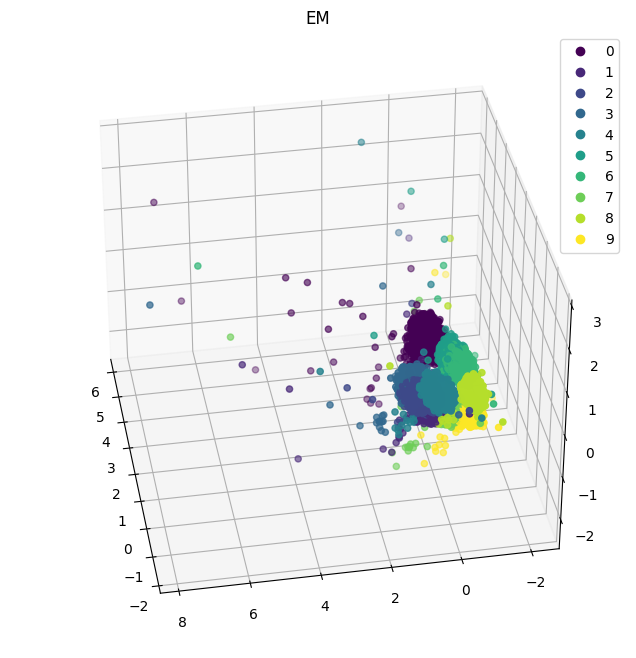

In [71]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13I_data1_scatter.pdf')

In [72]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [73]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [74]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 37s 14ms/step - loss: 2.2097 - accuracy: 0.3385 - val_loss: 2.0335 - val_accuracy: 0.5049
Epoch 2/30
2532/2532 [==============================] - 26s 10ms/step - loss: 1.4911 - accuracy: 0.8265 - val_loss: 0.8484 - val_accuracy: 0.9666
Epoch 3/30
2532/2532 [==============================] - 29s 11ms/step - loss: 0.4338 - accuracy: 0.9869 - val_loss: 0.1939 - val_accuracy: 0.9946
Epoch 4/30
2532/2532 [==============================] - 30s 12ms/step - loss: 0.1088 - accuracy: 0.9972 - val_loss: 0.0780 - val_accuracy: 0.9977
Epoch 5/30
2532/2532 [==============================] - 29s 11ms/step - loss: 0.0503 - accuracy: 0.9984 - val_loss: 0.0504 - val_accuracy: 0.9988
Epoch 6/30
2532/2532 [==============================] - 34s 13ms/step - loss: 0.0328 - accuracy: 0.9990 - val_loss: 0.0399 - val_accuracy: 0.9989
Epoch 7/30
2532/2532 [==============================] - 29s 12ms/step - loss: 0.0249 - accuracy: 0.9991 - val_loss: 0.0343 -

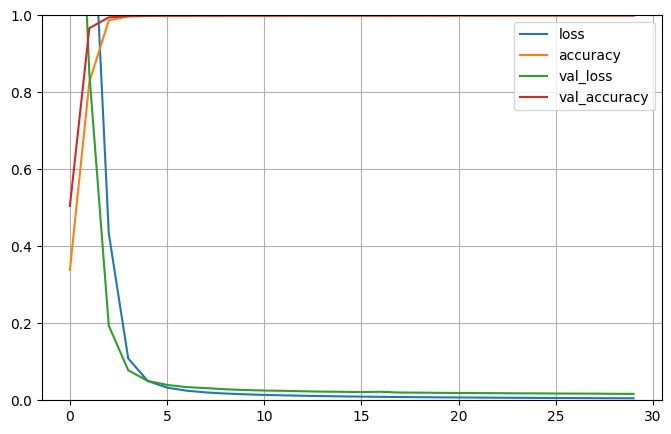

In [75]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [76]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")

In [77]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0041 - accuracy: 0.9997
test loss, test acc: [0.004110866691917181, 0.9997000098228455]


In [78]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [79]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    0  992    0    1    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   1    0    0    0    0 1026    0    0    0    0]
 [   0    0    0    0    0    0  998    0    0    1]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9997


Text(0.5, 1.0, 'Accuracy:1.000')

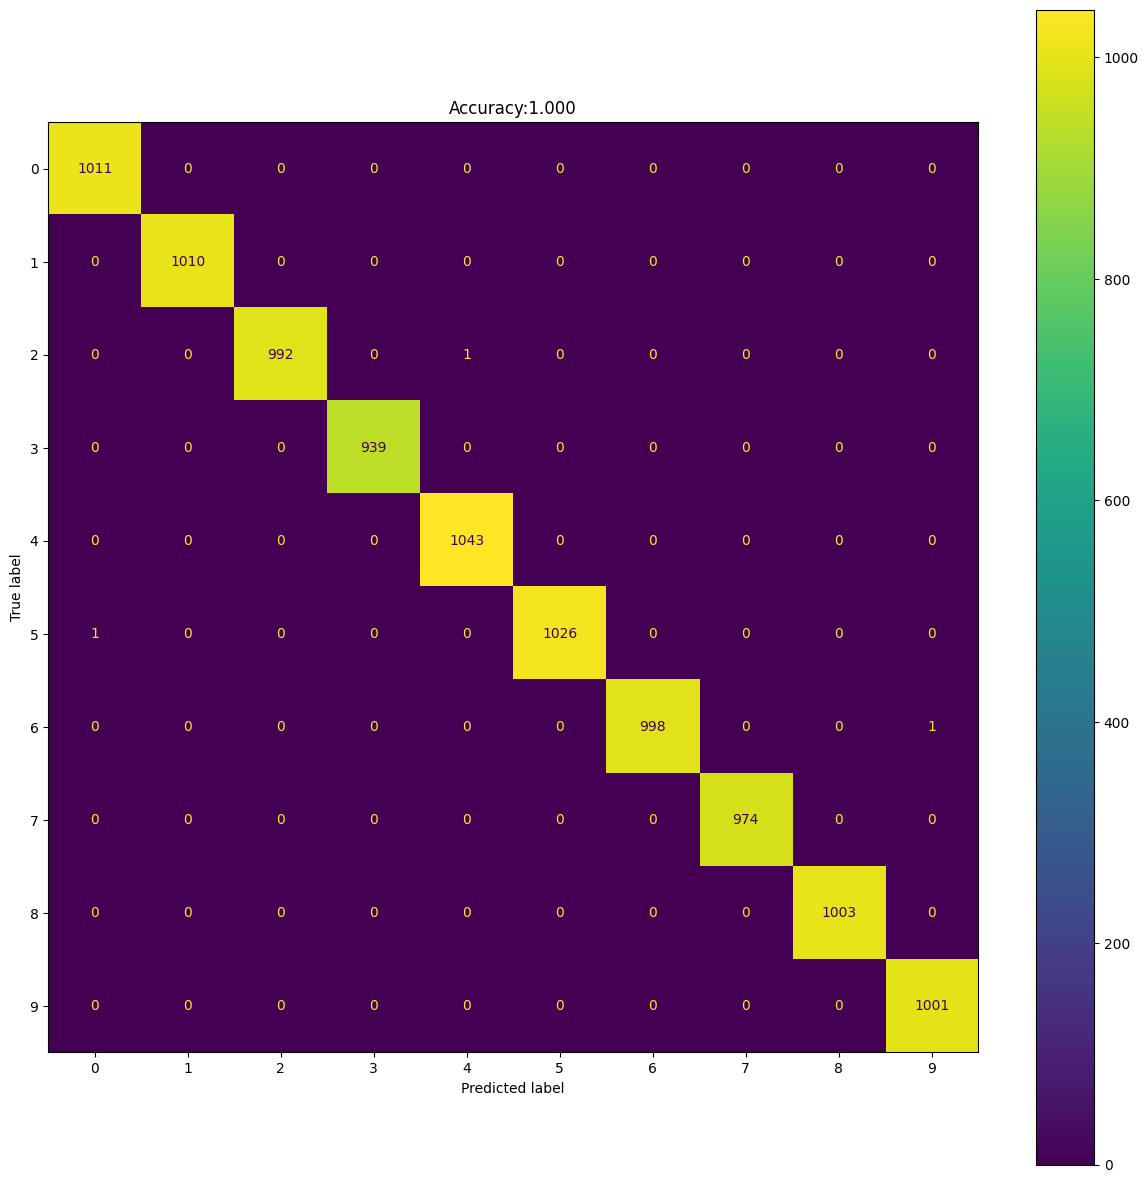

In [80]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 dataset

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_data2/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0078125+0.0234375j 0.       +0.j        0.0234375+0.j        ...
 0.       +0.0078125j 0.015625 +0.j        0.0234375+0.j       ]
2048
82435
(2048, 82435)
[0.01839778 0.00970962 0.00328338 ... 0.00214767 0.00365468 0.0095812 ]
(10000, 2048)
(10000,)
[0.0078125+0.j        0.       +0.015625j  0.0234375+0.0078125j ...
 0.015625 +0.j        0.0234375+0.0078125j 0.0234375+0.0078125j]
2048
86095
(2048, 86095)
[0.01843173 0.00946957 0.00374642 ... 0.00186381 0.00396029 0.00955348]
(20000, 2048)
(20000,)
[0.03125  +0.015625j  0.015625 +0.j        0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.0078125j 0.0234375+0.015625j ]
2048
73940
(2048, 73940)
[0.01829132 0.00990963 0.00342399 ... 0.00169991 0.00337759 0.00956888]
(30000, 2048)
(30000,)
[0.015625 +0.015625j  0.015625 +0.j        0.0078125-0.0078125j ...
 0.0234375+0.0078125j 0.0078125+0.015625j  0.015625 -0.0078125j]
2048
86822
(2048, 86822)
[0.01869311 0.00973575 0.00366161 ... 0.001999   0.00377608 0.00975098]
(40000, 204

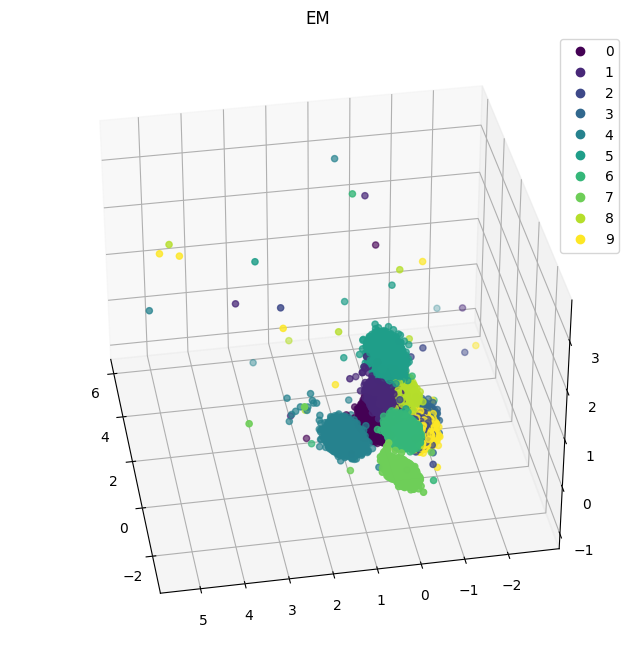

In [6]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13I_data2_scatter.pdf')

In [7]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210


2023-02-15 11:09:23.930150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Non-trainable params: 0
_________________________________________________________________


In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 33s 13ms/step - loss: 2.1652 - accuracy: 0.3347 - val_loss: 1.8889 - val_accuracy: 0.6069
Epoch 2/30
2532/2532 [==============================] - 26s 10ms/step - loss: 1.2778 - accuracy: 0.8587 - val_loss: 0.6133 - val_accuracy: 0.9816
Epoch 3/30
2532/2532 [==============================] - 32s 12ms/step - loss: 0.2847 - accuracy: 0.9914 - val_loss: 0.1233 - val_accuracy: 0.9958
Epoch 4/30
2532/2532 [==============================] - 40s 16ms/step - loss: 0.0793 - accuracy: 0.9973 - val_loss: 0.0528 - val_accuracy: 0.9978
Epoch 5/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.0414 - accuracy: 0.9987 - val_loss: 0.0323 - val_accuracy: 0.9988
Epoch 6/30
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0280 - accuracy: 0.9991 - val_loss: 0.0233 - val_accuracy: 0.9991
Epoch 7/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.0215 - accuracy: 0.9993 - val_loss: 0.0186 - 

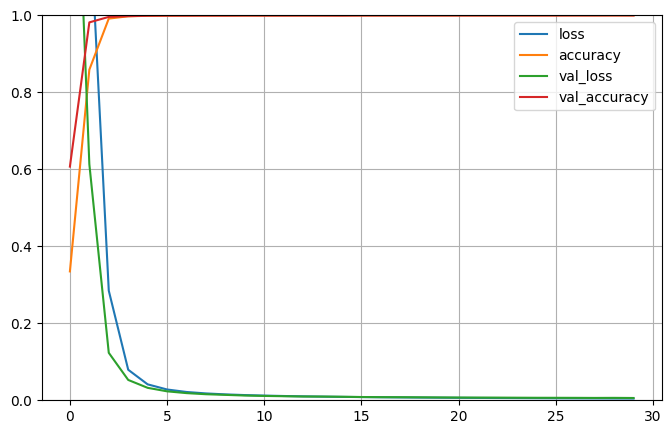

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")

In [12]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0057 - accuracy: 0.9998
test loss, test acc: [0.005689576733857393, 0.9998000264167786]


In [13]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    1]
 [   0    0  993    0    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    1    0    0  998    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9998


Text(0.5, 1.0, 'Accuracy:1.000')

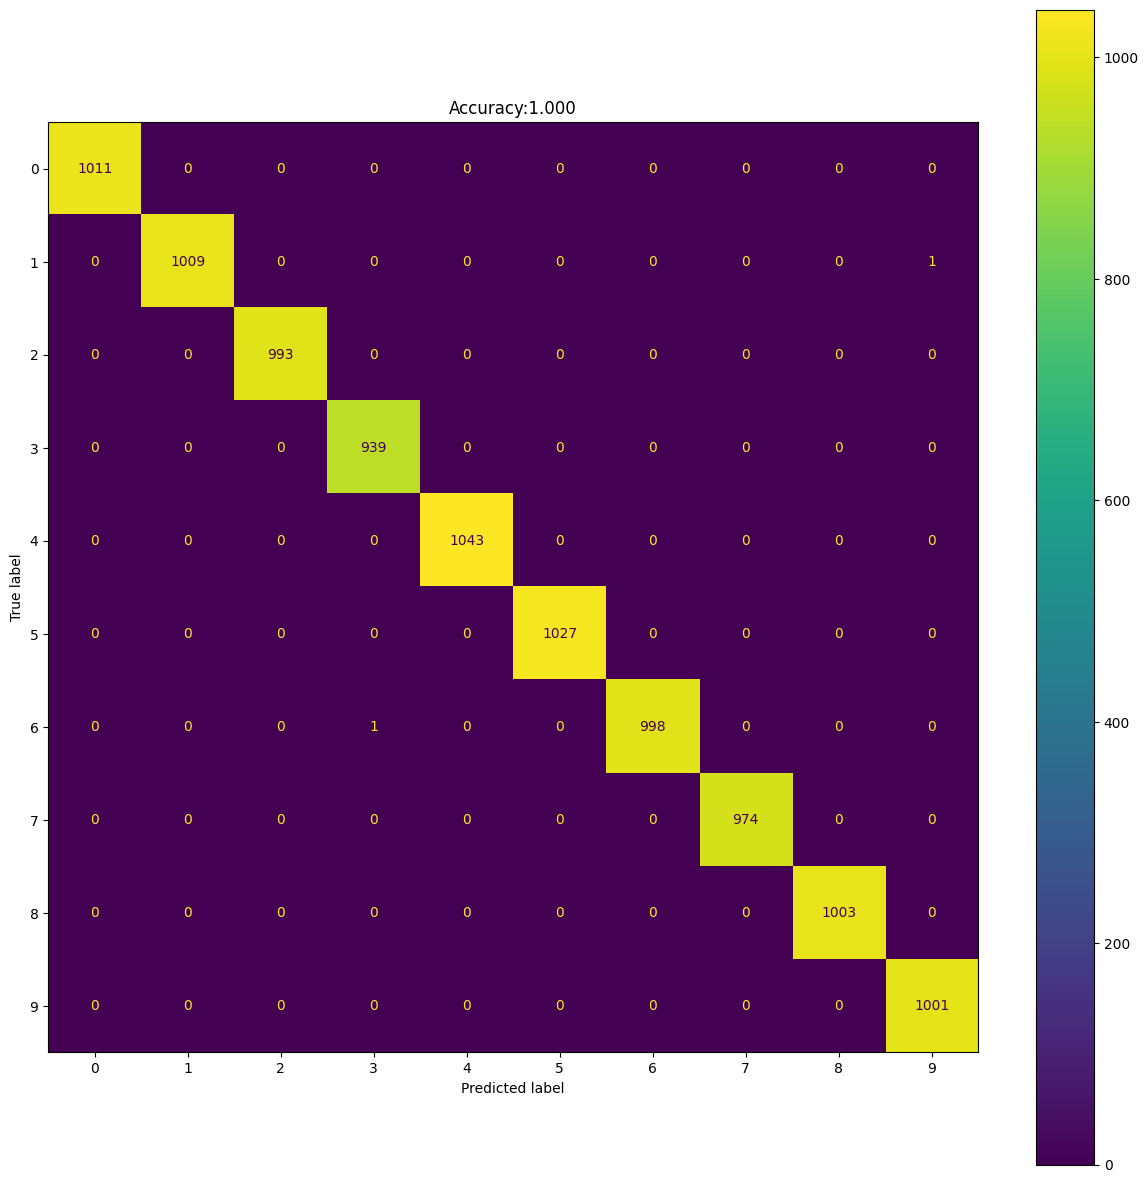

In [15]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II Own Model

In [20]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv', header=False)

[ 0.078125 +0.09375j    0.5625   -0.8046875j -0.984375 +0.9921875j ...
  0.015625 +0.015625j   0.0078125-0.0078125j  0.015625 +0.015625j ]
2048
81191
(2048, 81191)
[0.03497613 0.0617279  0.03110138 ... 0.02998163 0.05360715 0.04346049]
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.03125  +0.0078125j 0.0078125+0.015625j  ...
 0.0078125+0.0078125j 0.0234375+0.0078125j 0.015625 +0.j       ]
2048
72123
(2048, 72123)
[0.0184771  0.00980769 0.00377408 ... 0.00184979 0.00378497 0.00949242]
(20000, 2048)
(20000,)
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.0078125j]
2048
92893
(2048, 92893)
[0.01809648 0.00941779 0.00405625 ... 0.00197094 0.00359252 0.00953348]
(30000, 2048)
(30000,)
[-0.0078125-0.0078125j  0.0234375-0.0078125j  0.0234375+0.j        ...
  0.03125  +0.0078125j  0.015625 +0.0078125j  0.03125  +0.j       ]
2048
56322
(2048, 56322)
[0.01820297 0.00946224 0.00370945 ... 0.00208693 0.00383636 0.00951074]

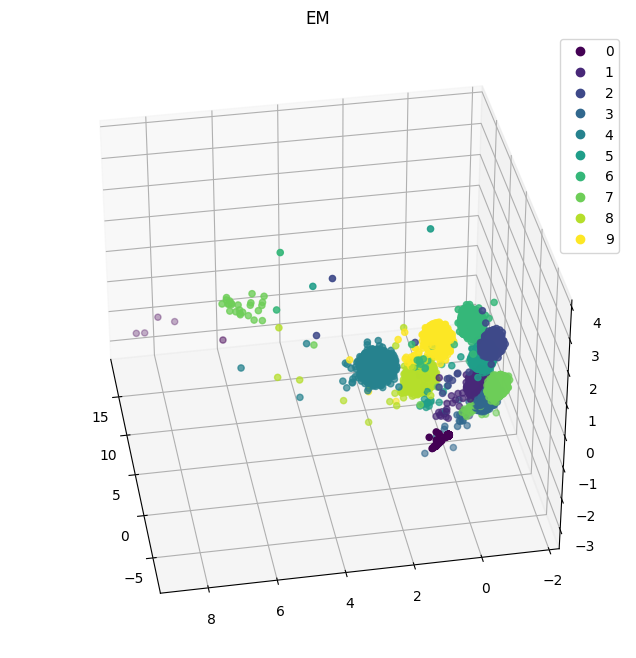

In [21]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13II_scatter.pdf')

In [22]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [24]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 26s 10ms/step - loss: 1.9924 - accuracy: 0.4976 - val_loss: 1.4138 - val_accuracy: 0.8743
Epoch 2/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.6942 - accuracy: 0.9758 - val_loss: 0.2722 - val_accuracy: 0.9978
Epoch 3/30
2532/2532 [==============================] - 31s 12ms/step - loss: 0.1400 - accuracy: 0.9986 - val_loss: 0.0930 - val_accuracy: 0.9986
Epoch 4/30
2532/2532 [==============================] - 25s 10ms/step - loss: 0.0594 - accuracy: 0.9988 - val_loss: 0.0619 - val_accuracy: 0.9989
Epoch 5/30
2532/2532 [==============================] - 29s 11ms/step - loss: 0.0410 - accuracy: 0.9990 - val_loss: 0.0502 - val_accuracy: 0.9989
Epoch 6/30
2532/2532 [==============================] - 24s 9ms/step - loss: 0.0329 - accuracy: 0.9991 - val_loss: 0.0425 - val_accuracy: 0.9991
Epoch 7/30
2532/2532 [==============================] - 25s 10ms/step - loss: 0.0278 - accuracy: 0.9992 - val_loss: 0.0373 - 

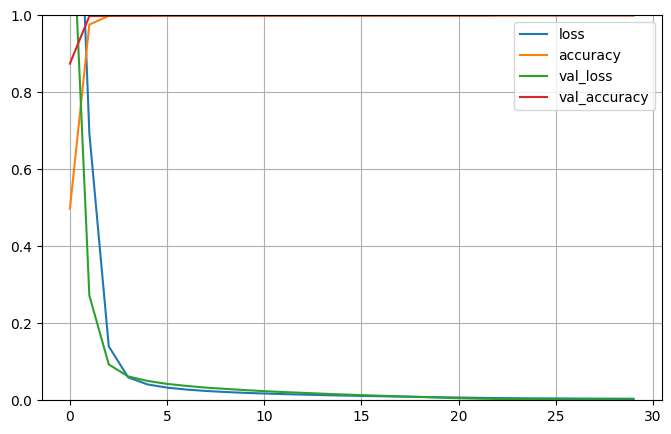

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")

In [27]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9996
test loss, test acc: [0.0050127203576266766, 0.9995999932289124]


In [28]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    0  991    0    0    0    1    0    0    1]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   1    0    0    0    0    0    0  973    0    0]
 [   0    0    0    0    1    0    0    0 1002    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9996


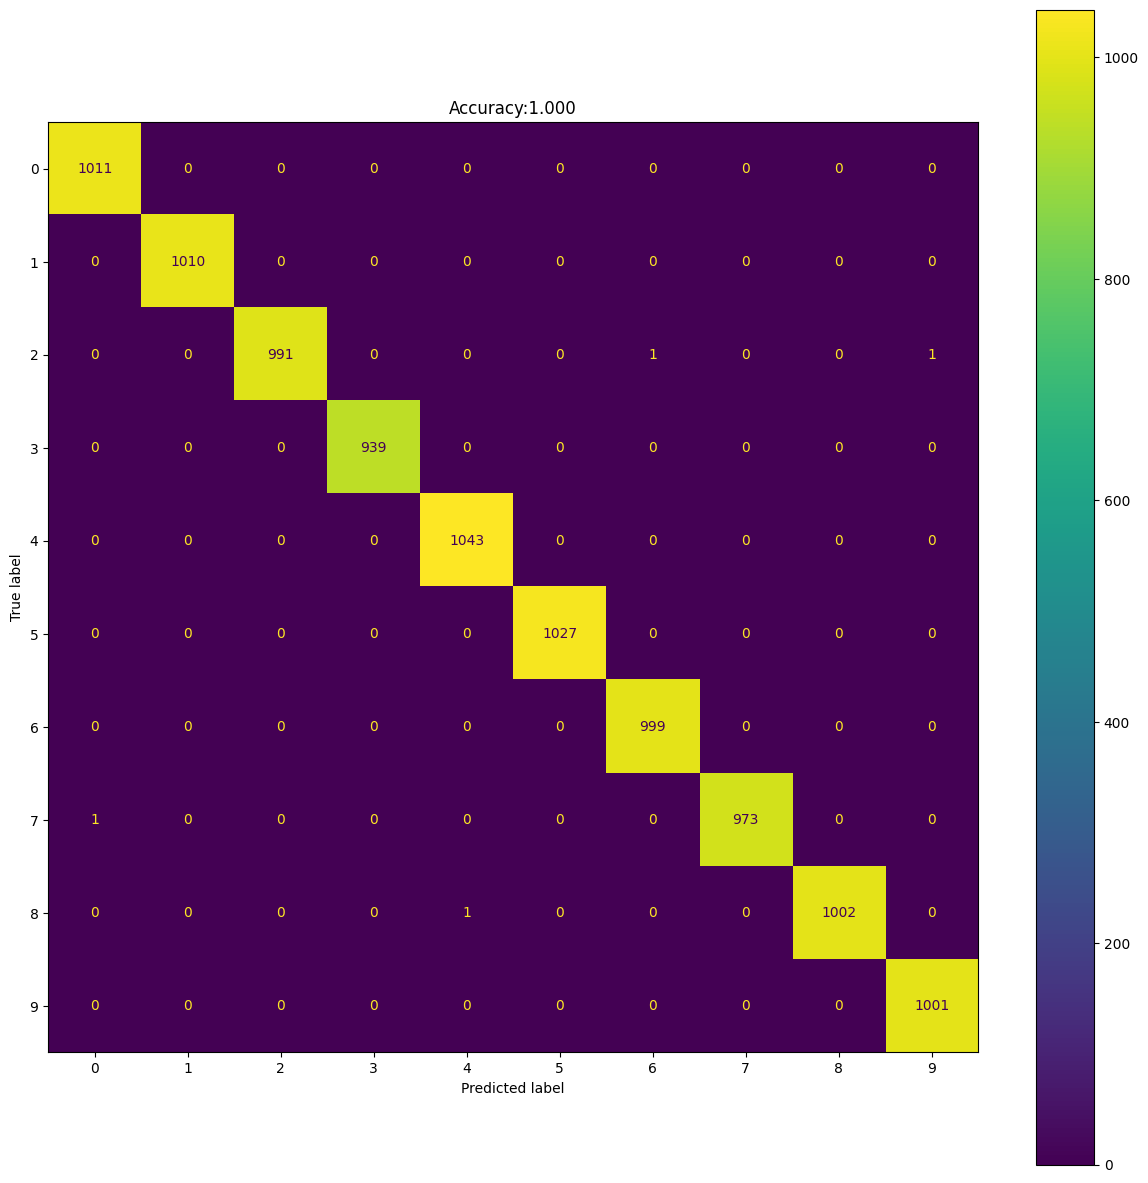

In [30]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III Own Model

In [35]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_III/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv', header=False)

[0.015625 +0.j        0.015625 +0.0078125j 0.0234375+0.015625j  ...
 0.       +0.j        0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
78558
(2048, 78558)
[0.01852033 0.00958475 0.00369698 ... 0.00181086 0.003753   0.00963692]
0
(10000, 2048)
(10000,)
[0.015625 +0.0234375j 0.0078125+0.j        0.0234375+0.j        ...
 0.03125  +0.0078125j 0.0078125+0.015625j  0.0078125+0.0234375j]
2048
74243
(2048, 74243)
[0.01901824 0.00952496 0.00361272 ... 0.00181022 0.00350893 0.00955064]
1
(20000, 2048)
(20000,)
[0.0234375+0.j        0.0234375+0.0234375j 0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.0078125j]
2048
79732
(2048, 79732)
[0.01835802 0.00962685 0.00344502 ... 0.00159603 0.00344605 0.00971396]
2
(30000, 2048)
(30000,)
[0.015625 +0.j        0.0234375+0.0078125j 0.0078125+0.015625j  ...
 0.       -0.0078125j 0.015625 -0.0078125j 0.03125  +0.0078125j]
2048
72926
(2048, 72926)
[0.01814387 0.00948817 0.00355478 ... 0.00184933 0.0035476  0.0094812 ]
3
(40

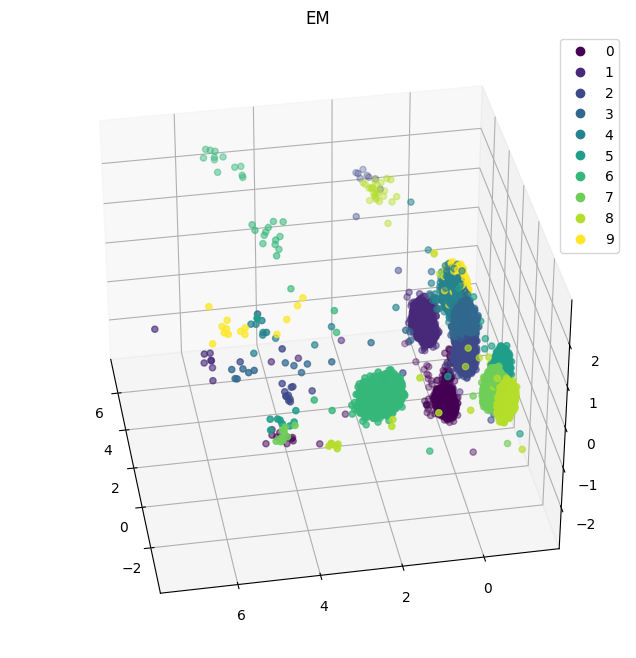

In [36]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13III_scatter.pdf')

In [37]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [39]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 31s 12ms/step - loss: 1.7777 - accuracy: 0.6081 - val_loss: 1.0083 - val_accuracy: 0.9524
Epoch 2/30
2532/2532 [==============================] - 23s 9ms/step - loss: 0.4811 - accuracy: 0.9844 - val_loss: 0.1952 - val_accuracy: 0.9943
Epoch 3/30
2532/2532 [==============================] - 23s 9ms/step - loss: 0.1176 - accuracy: 0.9976 - val_loss: 0.0796 - val_accuracy: 0.9974
Epoch 4/30
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0610 - accuracy: 0.9983 - val_loss: 0.0533 - val_accuracy: 0.9982
Epoch 5/30
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0439 - accuracy: 0.9984 - val_loss: 0.0419 - val_accuracy: 0.9982
Epoch 6/30
2532/2532 [==============================] - 22s 9ms/step - loss: 0.0355 - accuracy: 0.9985 - val_loss: 0.0352 - val_accuracy: 0.9982
Epoch 7/30
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0302 - accuracy: 0.9985 - val_loss: 0.0306 - val_a

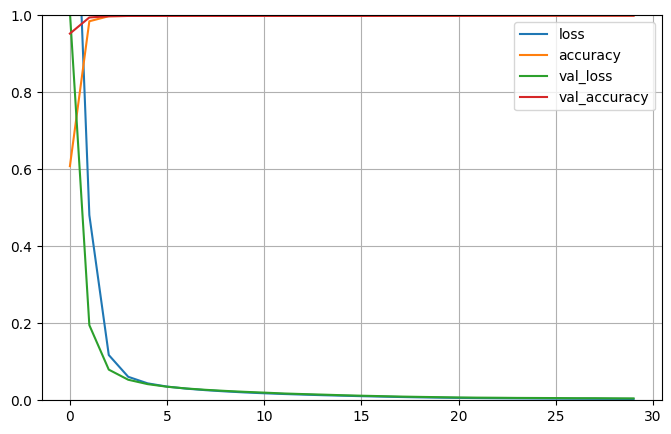

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/accuracy_and_loss_iPhone13_III.pdf')

In [41]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")

In [42]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.9991
test loss, test acc: [0.006146341562271118, 0.9991000294685364]


In [43]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1010    1    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   2    0  991    0    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    2  972    0    0]
 [   0    0    0    0    1    0    1    1  999    1]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9991


Text(0.5, 1.0, 'Accuracy:0.999')

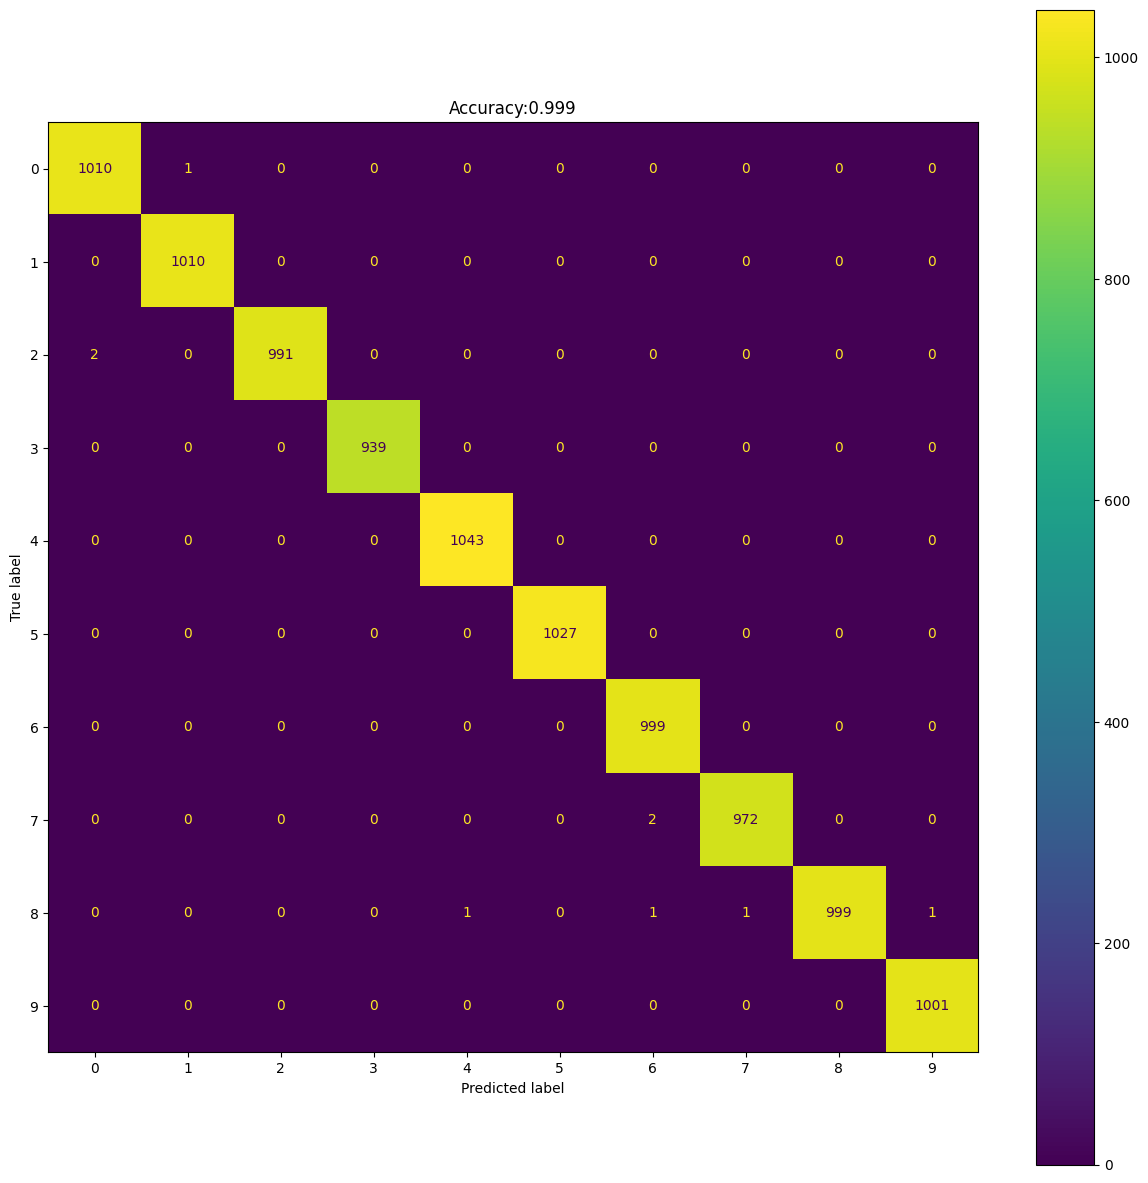

In [45]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')